In [2]:
##Pyber Project

# Start with the magic inline command
%matplotlib inline

# Dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Load the files
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"


In [4]:
# Load the city data into a Dataframe
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(5)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
# Load the ride data into a Dataframe
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.tail(5)

,city,date,fare,ride_id
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277
2374,Newtonview,2019-04-25 10:20:13,55.84,9990581345298


In [6]:
### Data Inspection
## Check rows and columns for null values
## Ensure correct data types; ie. driver_count
## List data points for each type of city

In [7]:
## City Check for Null Values
#City Data
#city_data_df.count() # returns 120 values in three fields
#city_data_df.isnull().sum() # sums null values per field.  
##No Nulls found in City Data.

In [8]:
## Ensure correct data type for driver_count so we can do calculations on field
#city_data_df.dtypes # driver count in int64. so we are good for calcs.
#ride_data_df.dtypes # ride data looks correct. Date treated as object\string

In [9]:
## List data points for each type of city
#  Get unique values for each field.
#city_data_df.dtypes
city_data_df["type"].unique() # uses unique() method on specific column
# we see we are dealing with Urban, Suburban and Rural types.
# our analysis requires stats by this catetory: of city "type"

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
## City Types : count of types
#sum(city_data_df["type"]=="Urban")
#sum(city_data_df["type"]=="Suburban")
#sum(city_data_df["type"]=="Rural")
## 66 Urban 36 Suburban  leaving 18 for Rural - math baby

In [11]:
## Inspect Ride Data Dataframe
ride_data_df.dtypes
## Check for Nulls
#ride_data_df.count() # returns 2375 values in four fields
#ride_data_df.isnull().sum() # sums null values per field.  
## No Nulls found in Ride Data.
#
## Inspect fare and ride_id fields for numerical
ride_data_df.dtypes
# ride data looks correct.fare is float 64 adn ride_id is int. Will work!

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [12]:
### Merge the DataFrame
#new_df = pd.merge(leftdf, rightdf, on=["column_leftdf", "column_rightdf"])
# In our case we join on city. 
# It is a left join since we want all ride data plus matching city data
pyber_data_df=pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])
#plus quick inspection of the new DF
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [13]:
## Now we create working DF for each city type. Bubble Charts woohoo!!
#  Create Urban cities DF
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()
#

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
# Create subarban DFs
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [15]:
# Create rural DFs
rural_cities_df=pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [16]:
## Create a series with number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [17]:
## Create a series with number of rides for suburban cities.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count

city
Barronchester         16
Bethanyland           18
Brandonfort           19
Colemanland           22
Davidfurt             17
East Aaronbury         9
East Danielview       17
East Kentstad         13
East Marymouth        27
Grayville             15
Josephside            27
Lake Ann              12
Lake Omar             14
Lake Robertside       25
Lake Scott            18
Lewishaven            12
Lewisland             17
Mezachester           17
Myersshire            16
New Olivia            17
New Raymond           22
New Shannonberg       17
Nicolechester         19
North Jeffrey         13
North Richardhaven    14
North Timothy         15
Port Shane            19
Rodriguezview         15
Sotoville             11
South Brenda          24
South Teresa          22
Veronicaberg          17
Victoriaport          14
West Hannah           21
West Kimmouth         20
Williamsonville       14
Name: ride_id, dtype: int64

In [18]:
## Create a series with number of rides for rural cities.
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [19]:
## Create a series of average ride per fare for urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [20]:
## Create a series of average ride per fare for suburban cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare

city
Barronchester         36.422500
Bethanyland           32.956111
Brandonfort           35.437368
Colemanland           30.894545
Davidfurt             31.995882
East Aaronbury        25.661111
East Danielview       31.560588
East Kentstad         29.823077
East Marymouth        30.835185
Grayville             27.763333
Josephside            32.858148
Lake Ann              30.890000
Lake Omar             28.075000
Lake Robertside       31.262000
Lake Scott            31.886111
Lewishaven            25.241667
Lewisland             34.614118
Mezachester           30.760000
Myersshire            30.203125
New Olivia            34.054118
New Raymond           27.961818
New Shannonberg       28.378235
Nicolechester         30.909474
North Jeffrey         29.242308
North Richardhaven    24.704286
North Timothy         31.262000
Port Shane            31.077895
Rodriguezview         30.745333
Sotoville             31.980000
South Brenda          33.964583
South Teresa          31.220455
Ver

In [21]:
## Create a series of average ride per fare for rural cities.
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare

city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64

In [23]:
## Create a series with average number of drivers for urban cities.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count

2405.0

In [23]:
## Create a series with average number of drivers for suburban cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count

city
Barronchester         11.0
Bethanyland           22.0
Brandonfort           10.0
Colemanland           23.0
Davidfurt             23.0
East Aaronbury         7.0
East Danielview       22.0
East Kentstad         20.0
East Marymouth         5.0
Grayville              2.0
Josephside            25.0
Lake Ann               3.0
Lake Omar             22.0
Lake Robertside        4.0
Lake Scott            23.0
Lewishaven            23.0
Lewisland              4.0
Mezachester           14.0
Myersshire            19.0
New Olivia            20.0
New Raymond           17.0
New Shannonberg       20.0
Nicolechester         19.0
North Jeffrey         11.0
North Richardhaven     1.0
North Timothy          7.0
Port Shane             7.0
Rodriguezview         20.0
Sotoville             10.0
South Brenda           1.0
South Teresa          21.0
Veronicaberg          20.0
Victoriaport          16.0
West Hannah           12.0
West Kimmouth          4.0
Williamsonville        2.0
Name: driver_count, dty

In [24]:
## Create a series with average number of drivers for rural cities.
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count

city
Bradshawfurt         7.0
Garzaport            7.0
Harringtonfort       4.0
Jessicaport          1.0
Lake Jamie           4.0
Lake Latoyabury      2.0
Michaelberg          6.0
New Ryantown         2.0
Newtonview           1.0
North Holly          8.0
North Jaime          1.0
Penaborough          6.0
Randallchester       9.0
South Jennifer       7.0
South Marychester    1.0
South Saramouth      7.0
Taylorhaven          1.0
West Heather         4.0
Name: driver_count, dtype: float64

In [26]:
### Now we can create our Bubble Chart!
#  x_axis is number of rides per city
#  y_axis is average fare for each city
#  marker size = average number of drivers per city

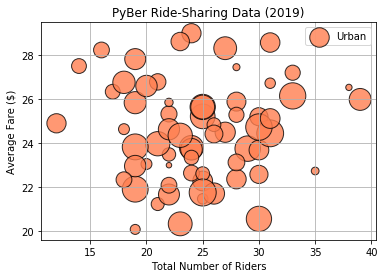

In [47]:
## Start with Urbanio
plt.scatter(urban_ride_count, urban_avg_fare # sets urban_ride_count, urban_avg_fare as x and y
            , s=10*urban_driver_count # sets size to 10x average driver count
            , c="coral" # color to coral
            , edgecolors ="black" # bubble edges to black
            , linewidths = 1 # bubble edges to thin line width of 1
            , alpha=0.8  # transparency to 80%
            , label="Urban" # legend label to Urban
            )
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Riders")
plt.grid(True)
plt.legend()

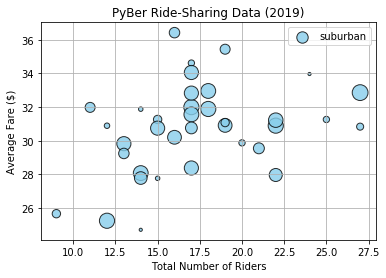

In [48]:
## Now suburban
plt.scatter(suburban_ride_count, suburban_avg_fare # sets suburban_ride_count, suburban_avg_fare as x and y
            , s=10*suburban_driver_count # sets size to 10x average driver count
            , c="skyblue" # color to coral
            , edgecolors ="black" # bubble edges to black
            , linewidths = 1 # bubble edges to thin line width of 1
            , alpha=0.8  # transparency to 80%
            , label="suburban" # legend label to suburban
            )
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Riders")
plt.grid(True)
plt.legend()

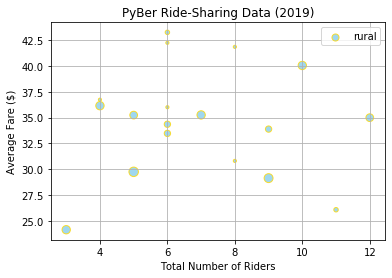

In [49]:
## Now rural
plt.scatter(rural_ride_count, rural_avg_fare # sets rural_ride_count, rural_avg_fare as x and y
            , s=10*rural_driver_count # sets size to 10x average driver count
            , c="skyblue" # color to coral
            , edgecolors ="gold" # bubble edges to black
            , linewidths = 1 # bubble edges to thin line width of 1
            , alpha=0.8  # transparency to 80%
            , label="rural" # legend label to rural
            )
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Riders")
plt.grid(True)
plt.legend()

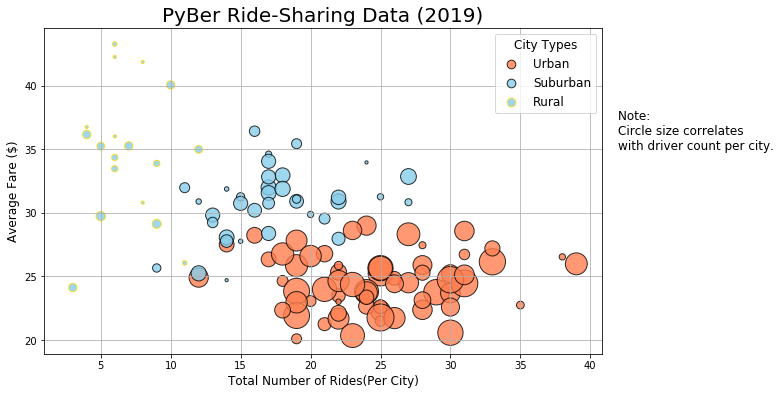

In [76]:
## Now we combine the bubble charts!   Combine the three sets of code into one cell. Ok.
plt.subplots(figsize=(10,6))  # sets a nice rectangular shape and size
# Start with Urban
plt.scatter(urban_ride_count, urban_avg_fare # sets urban_ride_count, urban_avg_fare as x and y
            , s=10*urban_driver_count # sets size to 10x average driver count
            , c="coral" # color to coral
            , edgecolors ="black" # bubble edges to black
            , linewidths = 1 # bubble edges to thin line width of 1
            , alpha=0.8  # transparency to 80%
            , label="Urban" # legend label to Urban
            )

# Now suburban
plt.scatter(suburban_ride_count, suburban_avg_fare # sets suburban_ride_count, suburban_avg_fare as x and y
            , s=10*suburban_driver_count # sets size to 10x average driver count
            , c="skyblue" # color to coral
            , edgecolors ="black" # bubble edges to black
            , linewidths = 1 # bubble edges to thin line width of 1
            , alpha=0.8  # transparency to 80%
            , label="Suburban" # legend label to suburban
            )

# Now rural
plt.scatter(rural_ride_count, rural_avg_fare # sets rural_ride_count, rural_avg_fare as x and y
            , s=10*rural_driver_count # sets size to 10x average driver count
            , c="skyblue" # color to coral
            , edgecolors ="gold" # bubble edges to black
            , linewidths = 1 # bubble edges to thin line width of 1
            , alpha=0.8  # transparency to 80%
            , label="Rural" # legend label to rural
            )
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20) # chart title
plt.ylabel("Average Fare ($)", fontsize=12) # y axis label with fontsize
plt.xlabel("Total Number of Rides(Per City)", fontsize=12) # x_axes label with fontsize
plt.grid(True) # show me the grid
# Legend Section
# sets lgnd as variable for plt.legend() with these four parameters.
lgnd = plt.legend(fontsize="12"
             ,mode="Expanded" # mode expands to fit area. 
             ,scatterpoints=1 # number of markers in the legend
             , loc="best"  # location of scatter plot based on available white space. nice!
             , title="City Types") # legend title
lgnd.legendHandles[0]._sizes = [75] # sets legend handle to 0.75 for first item in array
lgnd.legendHandles[1]._sizes = [75] # and so on for 2nd item.
lgnd.legendHandles[2]._sizes = [75] # and so on.
lgnd.get_title().set_fontsize(12) # legend title size
# # Add a note.  first two numbers indicate position of note in relation to plot points. wow. very sweet.
plt.text(42,35, "Note: \nCircle size correlates \nwith driver count per city.", fontsize="12")
# and save
plt.savefig("analysis/Fig1.png")
# Now Show
plt.show()

In [77]:
### Summary Stats - Number of rides by City type
##  Pandas describe() function on a Series or DataFrame
##  Pandas mean(), median(), mode() functions on Series
##  NumPy mean() and median (). SciPy mode() on Series

In [84]:
##  Pandas describe() function on a DataFrame
## Summary stats for cities.
#urban_cities_df.describe()
#suburban_cities_df.describe()
#rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [91]:
## Pandas describe() function on a Series
## Summary stats for Rides.
#urban_ride_count.describe()
#suburban_ride_count.describe()
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [107]:
##  Pandas mean(), median(), mode() functions on Series
# Each Variable represents a statistic for each City Types category.

# Ride Count Mean. generates a list of values for each variable. 
#round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

# Ride Count Median. 
#round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

# Ride Count Mode 
#round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

# Run each one and get a visual.Each category has a mode, 
# but Urbans two modes are larger than the rural and Sub, so they represent modes for the set.
#round(urban_ride_count.mode(),2)
#round(suburban_ride_count.mode(),2)
#round(rural_ride_count.mode(),2)

0    6
dtype: int64

In [108]:
###  NumPy mean() and median (). SciPy mode() on Series
##  Import new dependencies.  NumPy and SciPy
import numpy as np
import scipy.stats as sts

In [116]:
## Calcualte measures of central tendency for ride counts.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

## using SciPy mode() function
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

## using SciPy mode() function
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

## using SciPy mode() function
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")


The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [117]:
## Get summary statistics for average fares for city types

# Urban Fare using Numpy and SciPy
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [120]:
# Measures of central tendency for average fare. 
# NumPy and SciPy methods of calculating summary statistics
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [122]:
##  Numpy Mean and Median. SciPy Mode for Suburban

suburban_fares = suburban_cities_df["fare"]

mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [123]:
##  Numpy Mean and Median. SciPy Mode for rural

rural_fares = rural_cities_df["fare"]

mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [124]:
### Skill Drill 5.4.3: Summary Stats for Number of drivers by City Types using NumBy and SciPy

In [140]:
##  Urban: summary stats using Numby and SciPy

urban_drivers = urban_cities_df["driver_count"]
#urban_drivers.head()

mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver count for urban cities is {mean_urban_drivers:.0f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median driver count for urban cities is {median_urban_drivers:.0f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver count for urban cities is {mode_urban_drivers}.")

The mean driver count for urban cities is 37.
The median driver count for urban cities is 37.
The mode driver count for urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [141]:
##  Suburban summary stats

suburban_drivers = suburban_cities_df["driver_count"]


mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean driver count for suburban cities is {mean_suburban_drivers:.0f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median driver count for suburban cities is {median_suburban_drivers:.0f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode driver count for suburban cities is {mode_suburban_drivers}.")

The mean driver count for suburban cities is 14.
The median driver count for suburban cities is 16.
The mode driver count for suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [143]:
##  Rural summary stats

rural_drivers = rural_cities_df["driver_count"]

mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean driver count for rural cities is {mean_rural_drivers:.0f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median driver count for rural cities is {median_rural_drivers:.0f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode driver count for rural cities is {mode_rural_drivers}.")

The mean driver count for rural cities is 4.
The mean driver count for rural cities is 4.296.
The median driver count for rural cities is 4.
The mode driver count for rural cities is ModeResult(mode=array([1], dtype=int64), count=array([32])).


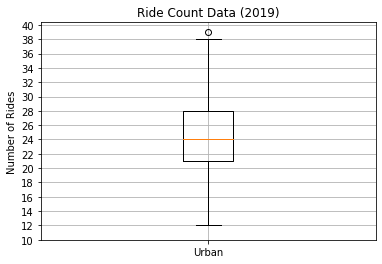

In [144]:
#### Box and Whisker Plots for Ride Count Data
## requires usage of the ax.boxplot() funtion which takes an array insdie parenthesis.

## Urban Box and Whisper for urban ride count
x_labels = ["Urban"]   # labels have to be set first in ax.plot() functions
fig, ax = plt.subplots()  # declares ax function
ax.boxplot(urban_ride_count, labels=x_labels) # sets the y axis, and labels property
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')  # Title 
ax.set_ylabel('Number of Rides') # ylabel
ax.set_yticks(np.arange(10, 41, step=2.0))  # y tick using np.arange. from 10-41 with steps of two
ax.grid()  # please give us a grid
plt.show()

In [145]:
## Urban Summary Stats for urban ride count
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

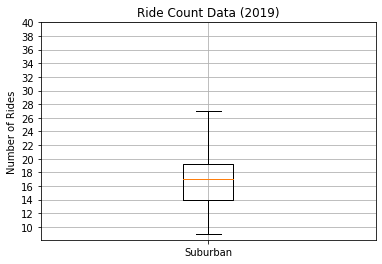

In [146]:
## Now Suburban Box and Whisper
x_labels = ["Suburban"]   # labels have to be set first in ax.plot() functions
fig, ax = plt.subplots()  # declares ax function
ax.boxplot(suburban_ride_count, labels=x_labels) # sets the y axis, and labels property
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')  # Title 
ax.set_ylabel('Number of Rides') # ylabel
ax.set_yticks(np.arange(10, 41, step=2.0))  # y tick using np.arange. from 10-41 with steps of two
ax.grid()  # grid
plt.show()

In [147]:
## Suburban Summary Stats for Suburban ride count
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

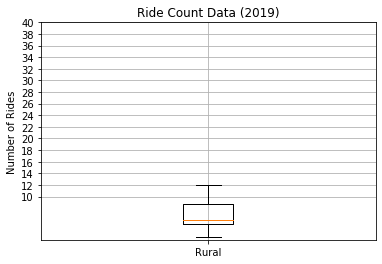

In [148]:
## Now Rural Box and Whisper
x_labels = ["Rural"]   # labels have to be set first in ax.plot() functions
fig, ax = plt.subplots()  # declares ax function
ax.boxplot(rural_ride_count, labels=x_labels) # sets the y axis, and labels property
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')  # Title 
ax.set_ylabel('Number of Rides') # ylabel
ax.set_yticks(np.arange(10, 41, step=2.0))  # y tick using np.arange. from 10-41 with steps of two
ax.grid()  # grid
plt.show()

In [149]:
## Rurual summary Stats for ride count
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

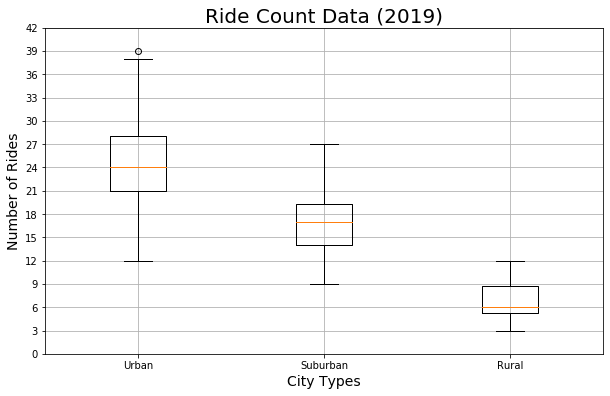

In [150]:
### Now we add all cites to one box and whisper plot

x_labels = ["Urban", "Suburban","Rural"]  #always labels first as variable to be later used in the boxplot
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count] # create series
fig, ax = plt.subplots(figsize=(10, 6))  # declare ax method with a nice rectangular size\shape
ax.set_title('Ride Count Data (2019)',fontsize=20) # set title wiht font size
ax.set_ylabel('Number of Rides',fontsize=14) # set y label with fontsize
ax.set_xlabel("City Types",fontsize=14) # set x label with fontsize
ax.boxplot(ride_count_data, labels=x_labels)  ## specify a boxplot with labels.
ax.set_yticks(np.arange(0, 45, step=3.0))  # set y ticks using NumPy arange()
ax.grid() # grid please 

# Save the plot
plt.savefig("analysis/Fig2.png")
plt.show()  # very nice - three box and whispers side to side

In [164]:
## ID the Outlier. which city has the highest driver count (urban = 39).
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0] ## index seems unnecessary
print(f"{urban_city_outlier} has the largest rider count.")

West Angela has the largest rider count.


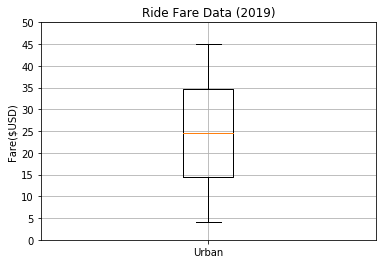

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [169]:
### Now Box and Whisker for Ride Fare Data

## Urban
x_labels = ["Urban"]  # our labels variable
fig, ax = plt.subplots()  # object oriented method for plot
ax.boxplot(urban_fares, labels=x_labels)  # call urban_fares as y data
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')   # title
ax.set_ylabel('Fare($USD)') # y label
ax.set_yticks(np.arange(0, 51, step=5.0))  # y ticks and steps
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

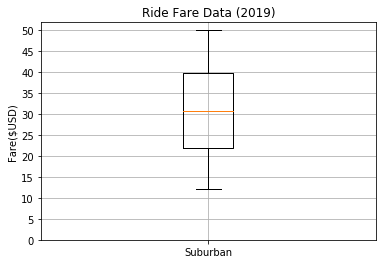

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [170]:
### SkillDrill 5.4.4 Box and Whisper plots for suburban_fares and rural_fares

## first Suburban

x_labels = ["Suburban"]  # our labels variable
fig, ax = plt.subplots()  # object oriented method for plot
ax.boxplot(suburban_fares, labels=x_labels)  # call suburban_fares as y data
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')   # title
ax.set_ylabel('Fare($USD)') # y label
ax.set_yticks(np.arange(0, 51, step=5.0))  # y ticks and steps
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

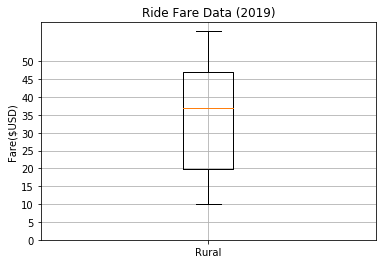

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [171]:
## and now rural 

x_labels = ["Rural"]  # our labels variable
fig, ax = plt.subplots()  # object oriented method for plot
ax.boxplot(rural_fares, labels=x_labels)  # call suburban_fares as y data
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')   # title
ax.set_ylabel('Fare($USD)') # y label
ax.set_yticks(np.arange(0, 51, step=5.0))  # y ticks and steps
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

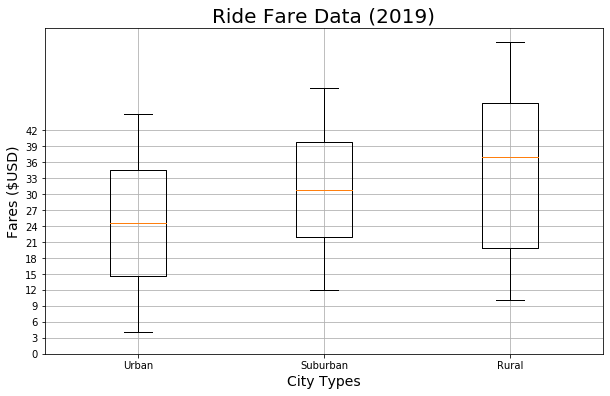

In [173]:
### Skill Drill 5.4.4  Combine three Box and Whisper Charts for Ride Fare Data

x_labels = ["Urban", "Suburban","Rural"]  #always labels first as variable to be later used in the boxplot
ride_fare_data = [urban_fares, suburban_fares, rural_fares] # create series
fig, ax = plt.subplots(figsize=(10, 6))  # declare ax method with a nice rectangular size\shape
ax.set_title('Ride Fare Data (2019)',fontsize=20) # set title wiht font size
ax.set_ylabel('Fares ($USD)',fontsize=14) # set y label with fontsize
ax.set_xlabel("City Types",fontsize=14) # set x label with fontsize
ax.boxplot(ride_fare_data, labels=x_labels)  ## specify a boxplot with labels. Use ride_fare_data
ax.set_yticks(np.arange(0, 45, step=3.0))  # set y ticks using NumPy arange()
ax.grid() # grid please 

# Save the plot
plt.savefig("analysis/Fig3.png")
plt.show()  # will it work?

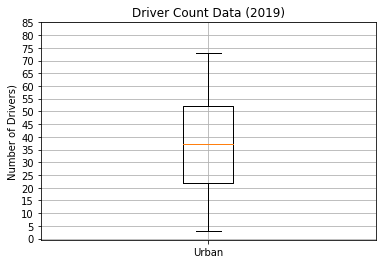

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [174]:
### Now some plots on driver count data. Using urban_drivers series genearated earlier

## First Urban
x_labels = ["Urban"]  # x labels variable
fig, ax = plt.subplots() # object oriented method
ax.boxplot(urban_drivers,labels=x_labels) # call boxplot using urban_drivers series.
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')  # title
ax.set_ylabel('Number of Drivers)') # Y label
ax.set_yticks(np.arange(0, 90, step=5.0)) # y ticks and steps
ax.grid() # grid please
plt.show()
print("Summary Statistics")
urban_drivers.describe()  # summary stats always good to disply with Box and Whisper

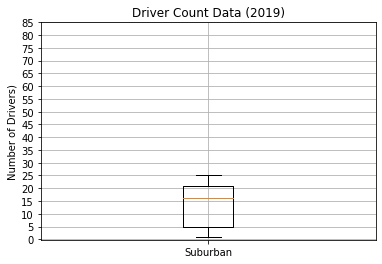

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [175]:
### Skill Drill 5.4.4 Box and Whisper plots for Driver Count Data for Subsuburban and Rural

## First Suburban
x_labels = ["Suburban"]  # x labels variable
fig, ax = plt.subplots() # object oriented method
ax.boxplot(suburban_drivers,labels=x_labels) # call boxplot using suburban_drivers series.
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')  # title
ax.set_ylabel('Number of Drivers)') # Y label
ax.set_yticks(np.arange(0, 90, step=5.0)) # y ticks and steps
ax.grid() # grid please
plt.show()
print("Summary Statistics")
suburban_drivers.describe()  # summary stats always good to disply with Box and Whisper

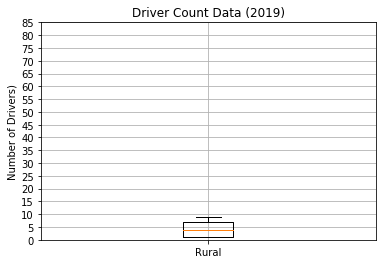

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [176]:
## Now Rural Driver Count Box and Whisper

x_labels = ["Rural"]  # x labels variable
fig, ax = plt.subplots() # object oriented method
ax.boxplot(rural_drivers,labels=x_labels) # call boxplot using rural_drivers series.
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')  # title
ax.set_ylabel('Number of Drivers)') # Y label
ax.set_yticks(np.arange(0, 90, step=5.0)) # y ticks and steps
ax.grid() # grid please
plt.show()
print("Summary Statistics")
rural_drivers.describe()  # summary stats always good to disply with Box and Whisper

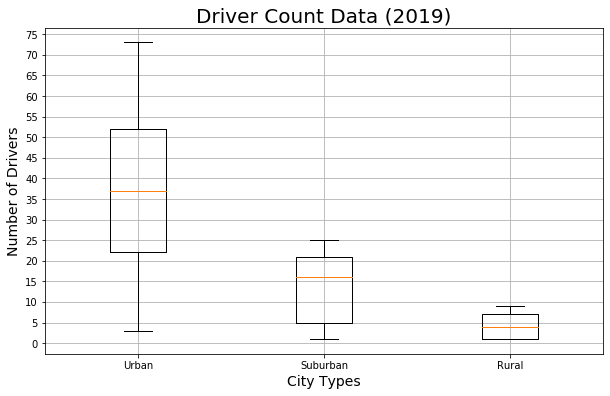

In [182]:
### Skill Drill. Create combined box and whispers for Driver Count data.


x_labels = ["Urban", "Suburban","Rural"]  # label variable 
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers] # create series of three driver series.
fig, ax = plt.subplots(figsize=(10, 6))  # declare ax method with a nice rectangular size\shape
ax.set_title('Driver Count Data (2019)',fontsize=20) # set title with font size
ax.set_ylabel('Number of Drivers',fontsize=14) # set y label with fontsize
ax.set_xlabel("City Types",fontsize=14) # set x label with fontsize
ax.boxplot(driver_count_data, labels=x_labels)  ## specify a boxplot with labels. Use driver_count_data
ax.set_yticks(np.arange(0, 76, step=5.0))  # set y ticks using NumPy arange()
ax.grid() # grid please 

# Save the plot
plt.savefig("analysis/Fig4.png")
plt.show()  

In [183]:
## commit our work. good work. getting familiar with Python and plotting for sure. 

In [184]:
#### Pie Chart Percentage of Fares for Each City Type
    ## Total Fares for each city type
## Total for all Fares for all city types
## Calc Percentage of the toal fares for each city type

In [186]:
## Total Fares for each city type
# Urban Cities: gen a Series from pyber DF, group by type. stat is sum of fare
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [188]:
## Sum of all Fares
total_fares=pyber_data_df["fare"].sum()
total_fares

63538.64

In [189]:
## Calc %
type_percents = 100 * sum_fares_by_type  / total_fares 
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [190]:
## do it all at once in one line by joining commands
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

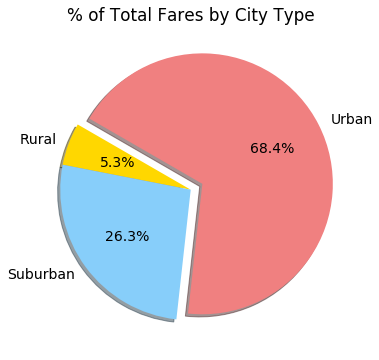

In [214]:
### Now we pie up the Percentage Fares by City Type

## Load matplotlib so we can use rcParams() to control font sizes
#      rcParams() accesses the run and configure settings for matplolib
import matplotlib as mpl  # call the matplotlib library

## Set the chart size
plt.subplots(figsize=(10,6))

## Build chart
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"]  # sets type_percents as Y. labels legend
       , colors=["gold","lightskyblue","lightcoral"]
       , explode=[0,0,0.1] #explodes third wedge by ten percent
       , autopct= "%1.1f%%" # format as percentage 
       , shadow=True # shadow the wedges.
       , startangle = 150 # sets top point
       )
plt.title("% of Total Fares by City Type")

mpl.rcParams['font.size']=14 ## use rcParams() to change default font size

plt.savefig("analysis/Fig5") # save chart to drive

plt.show()

In [202]:
####  Pie Chart: Percentage of Total Rides by City Type
   
 # Total number of rides for each city type
 # Total for all city types
 # Percentage of total rides for each city type.

pyber_data_df # quick data preview.

In [206]:
##  Total number of rides for each city type
sum_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
sum_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [207]:
## Sum of all rides
total_rides=pyber_data_df["ride_id"].count()
total_rides

2375

In [211]:
## Calc %
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

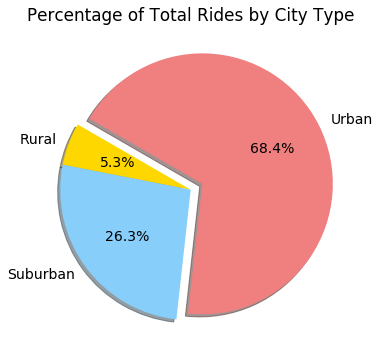

In [222]:
## Build pie  chart for Percentage of Total Rides by City Type

## no need to reimport the matpotlib

## Set the chart size
plt.subplots(figsize=(10,6))

## Build the pie
plt.pie(ride_percents, labels=["Rural", "Suburban", "Urban"]  # sets ride_percents as Y. labels legend
       , colors=["gold","lightskyblue","lightcoral"]
       , explode=[0,0,0.1] #explodes third wedge by ten percent
       , autopct= "%1.1f%%" # format as percentage 
       , shadow=True # shadow the wedges.
       , startangle = 150 # sets top point
       )
plt.title("Percentage of Total Rides by City Type")

mpl.rcParams['font.size']=14 ## use rcParams() to change default font size

plt.savefig("analysis/Fig6") # save chart to drive

plt.show()

In [217]:
####  Pie Chart: Percentage of Total Drivers by City Type
   
 # Total number of drivers for each city type
 # Total for all drivers for all
 # Percentage of total drivers for each city type.

pyber_data_df # quick data preview.

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [218]:
# Total number of drivers for each city type
sum_drivers_by_type = pyber_data_df.groupby(["type"]).sum()["driver_count"]
sum_drivers_by_type

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [219]:
## Sum of all drivers
total_drivers=pyber_data_df["driver_count"].sum()
total_drivers

68709

In [220]:
# Percentage of total drivers for each city type
driver_percents = 100 * pyber_data_df.groupby(["type"]).sum()["driver_count"] / pyber_data_df["driver_count"].sum()
driver_percents

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

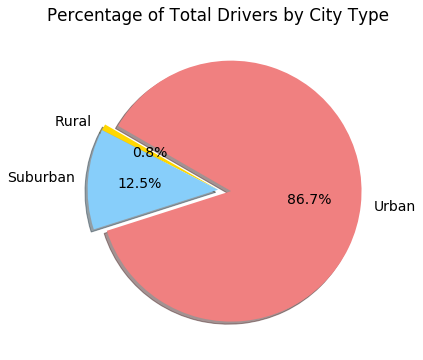

In [223]:
## Build pie chart for Percentage of Drivers by City Type

## no need to reimport the matpotlib

## Set the chart size
plt.subplots(figsize=(10,6))

## Build the pie
plt.pie(driver_percents, labels=["Rural", "Suburban", "Urban"]  # sets driver_percents as Y. labels legend
       , colors=["gold","lightskyblue","lightcoral"]
       , explode=[0,0,0.1] #explodes third wedge by ten percent
       , autopct= "%1.1f%%" # format as percentage 
       , shadow=True # shadow the wedges.
       , startangle = 150 # sets top point
       )
plt.title("Percentage of Total Drivers by City Type")

mpl.rcParams['font.size']=14 ## use rcParams() to change default font size

plt.savefig("analysis/Fig7") # save chart to drive

plt.show()

In [ ]:
## final commit for this Module.  that was fun. 